In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('titanic.csv')
df

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


In [58]:
df.index

RangeIndex(start=0, stop=1313, step=1)

In [59]:
df.values

array([[1, 'Allen, Miss Elisabeth Walton', '1st', ..., 'female', 1, 1],
       [2, 'Allison, Miss Helen Loraine', '1st', ..., 'female', 0, 1],
       [3, 'Allison, Mr Hudson Joshua Creighton', '1st', ..., 'male', 0,
        0],
       ...,
       [1311, 'Zenni, Mr Philip', '3rd', ..., 'male', 0, 0],
       [1312, 'Lievens, Mr Rene', '3rd', ..., 'male', 0, 0],
       [1313, 'Zimmerman, Leo', '3rd', ..., 'male', 0, 0]], dtype=object)

In [90]:
people_by_class = df.groupby('PClass')['Survived'].sum()

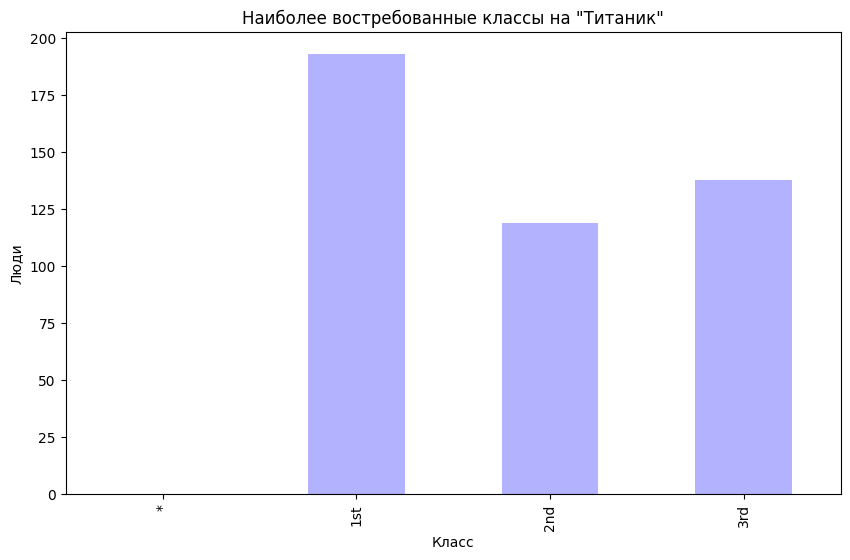

In [77]:
plt.figure(figsize=(10,6))
people_by_class.plot(kind = 'bar', color = 'b', alpha = 0.3)
plt.title('Наиболее востребованные классы на "Титаник"')
plt.xlabel('Класс')
plt.ylabel('Люди')
plt.show()